In [1]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel

In [14]:
df = pd.read_csv('./total_data.csv', encoding ='utf-8')

In [15]:
# 긍정 / 부정 분리
positive_count = len(df[df['classification'] == '긍정'])
negative_count = len(df[df['classification'] == '부정'])

total_count = positive_count + negative_count

# 비율 계산
positive_ratio = (positive_count / total_count) * 100
negative_ratio = (negative_count / total_count) * 100

print(f"긍정 개수: {positive_count}, 비율: {positive_ratio:.2f}%")
print(f"부정 개수: {negative_count}, 비율: {negative_ratio:.2f}%")

긍정 개수: 1815, 비율: 74.78%
부정 개수: 612, 비율: 25.22%


In [16]:
NUM_TOPICS = 10
PASSES = 15

In [17]:
def lda_modeling(review_prep):
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    model = gensim.models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=PASSES)
    return model, corpus, dictionary

In [18]:
# 3. 긍정 리뷰 데이터 추출

review_prep_neg = df[df['classification'] == '부정']['one_word_removed'].dropna().str.split().tolist()

In [19]:
# 4. LDA 모델링 수행

model, _, _ = lda_modeling(review_prep_pos)

In [20]:
# 5. 토픽별 주요 단어와 그 비율 출력
NUM_WORDS = 10

# 5. 토픽별 주요 단어와 그 비율 출력
topics_neg = model.print_topics(num_words=NUM_WORDS)

topics_output_neg = []
for topic in topics_neg:
    words_with_quotes = []
    for word_prob in topic[1].split(' + '):
        prob, word = word_prob.split('*')
        word_with_quote = f'{prob}*" {word.strip()} "'
        words_with_quotes.append(word_with_quote)
    topic_str = " + ".join(words_with_quotes)
    topics_output_pos.append(topic_str)

topics_output_neg

[]

In [21]:
neg_words = ' '.join(df['one_word_removed'].astype(str))
neg_words_split = neg_words.split()
neg_words_split[:5]

['네트워크', '오류', '와이파이', '로그인', '일시']

In [22]:
from collections import Counter
Counter(neg_words_split)

Counter({'네트워크': 9,
         '오류': 15,
         '와이파이': 3,
         '로그인': 13,
         '일시': 2,
         '뜨다': 19,
         '간병인': 1066,
         '결정': 2,
         '결제': 96,
         '주말': 4,
         '이르다': 63,
         '고객': 69,
         '센터': 71,
         '전화': 65,
         '해결': 15,
         '기르다': 2,
         '바라다': 11,
         '카카오': 18,
         '시작': 30,
         '회원': 43,
         '가입': 32,
         '튕기': 2,
         '삭제': 8,
         '설치': 6,
         '해도': 17,
         '튕깁': 1,
         '탈퇴': 12,
         '아무': 7,
         '애플리케이션': 321,
         '열기': 1,
         '권한': 13,
         '설정': 9,
         '들어가다': 11,
         '직접': 56,
         '열리다': 3,
         '크롬': 1,
         '신청': 33,
         '어플': 154,
         '아예': 3,
         '난처하다': 1,
         '간병': 433,
         '서비스': 77,
         '늘다': 156,
         '유용하다': 31,
         '접속': 3,
         '사용': 295,
         '건가': 3,
         '금액': 13,
         '상한선': 1,
         '하루': 23,
         '30만원': 1,
         '지원': 97,
 

In [25]:
# !pip install wordcloud

In [37]:
font_path = 'C:\\Users\\moony\\BMDOHYEON_ttf.ttf'

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
stopwords = set(STOPWORDS)
stopwords.update(['좋다', '간병인', '감사하다', '편하다', '친절하다', '애플리케이션', '자다', '케어 네이션', '좋다 간병인', '생각', '서다', '이르다'])
wordCloud = WordCloud(width=3000, height=3000, max_words=150, scale =5.0, stopwords=stopwords, font_path=font_path, colormap='coolwarm')
wordCloud.generate_from_text(neg_words)

C:\Users\moony\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


In [38]:
wordCloud.words_

{'간병': 1.0,
 '사용': 0.5256410256410257,
 '케어 네이션': 0.4717948717948718,
 '많다': 0.4153846153846154,
 '늘다': 0.4,
 '해주다': 0.39487179487179486,
 '선택': 0.36923076923076925,
 '리뷰': 0.36153846153846153,
 '어플': 0.35128205128205126,
 '처음': 0.34102564102564104,
 '매칭': 0.28205128205128205,
 '필요하다': 0.2512820512820513,
 '만나다': 0.24615384615384617,
 '쓰다': 0.23333333333333334,
 '환자': 0.22564102564102564,
 '병원': 0.2230769230769231,
 '만족스럽다': 0.21794871794871795,
 '도움': 0.2076923076923077,
 '보호자': 0.20512820512820512,
 '지원': 0.19230769230769232,
 '마음': 0.18974358974358974,
 '덕분': 0.18974358974358974,
 '힘들다': 0.18974358974358974,
 '확인': 0.17435897435897435,
 '만족하다': 0.17435897435897435,
 '괜찮다': 0.1717948717948718,
 '찾다': 0.1717948717948718,
 '고객 센터': 0.1717948717948718,
 '추천': 0.16923076923076924,
 '엄마': 0.16923076923076924,
 '급하다': 0.16153846153846155,
 '사람': 0.15897435897435896,
 '구해': 0.15128205128205127,
 '협회': 0.15128205128205127,
 '전화': 0.14358974358974358,
 '서비스': 0.14358974358974358,
 '어렵다': 0.14

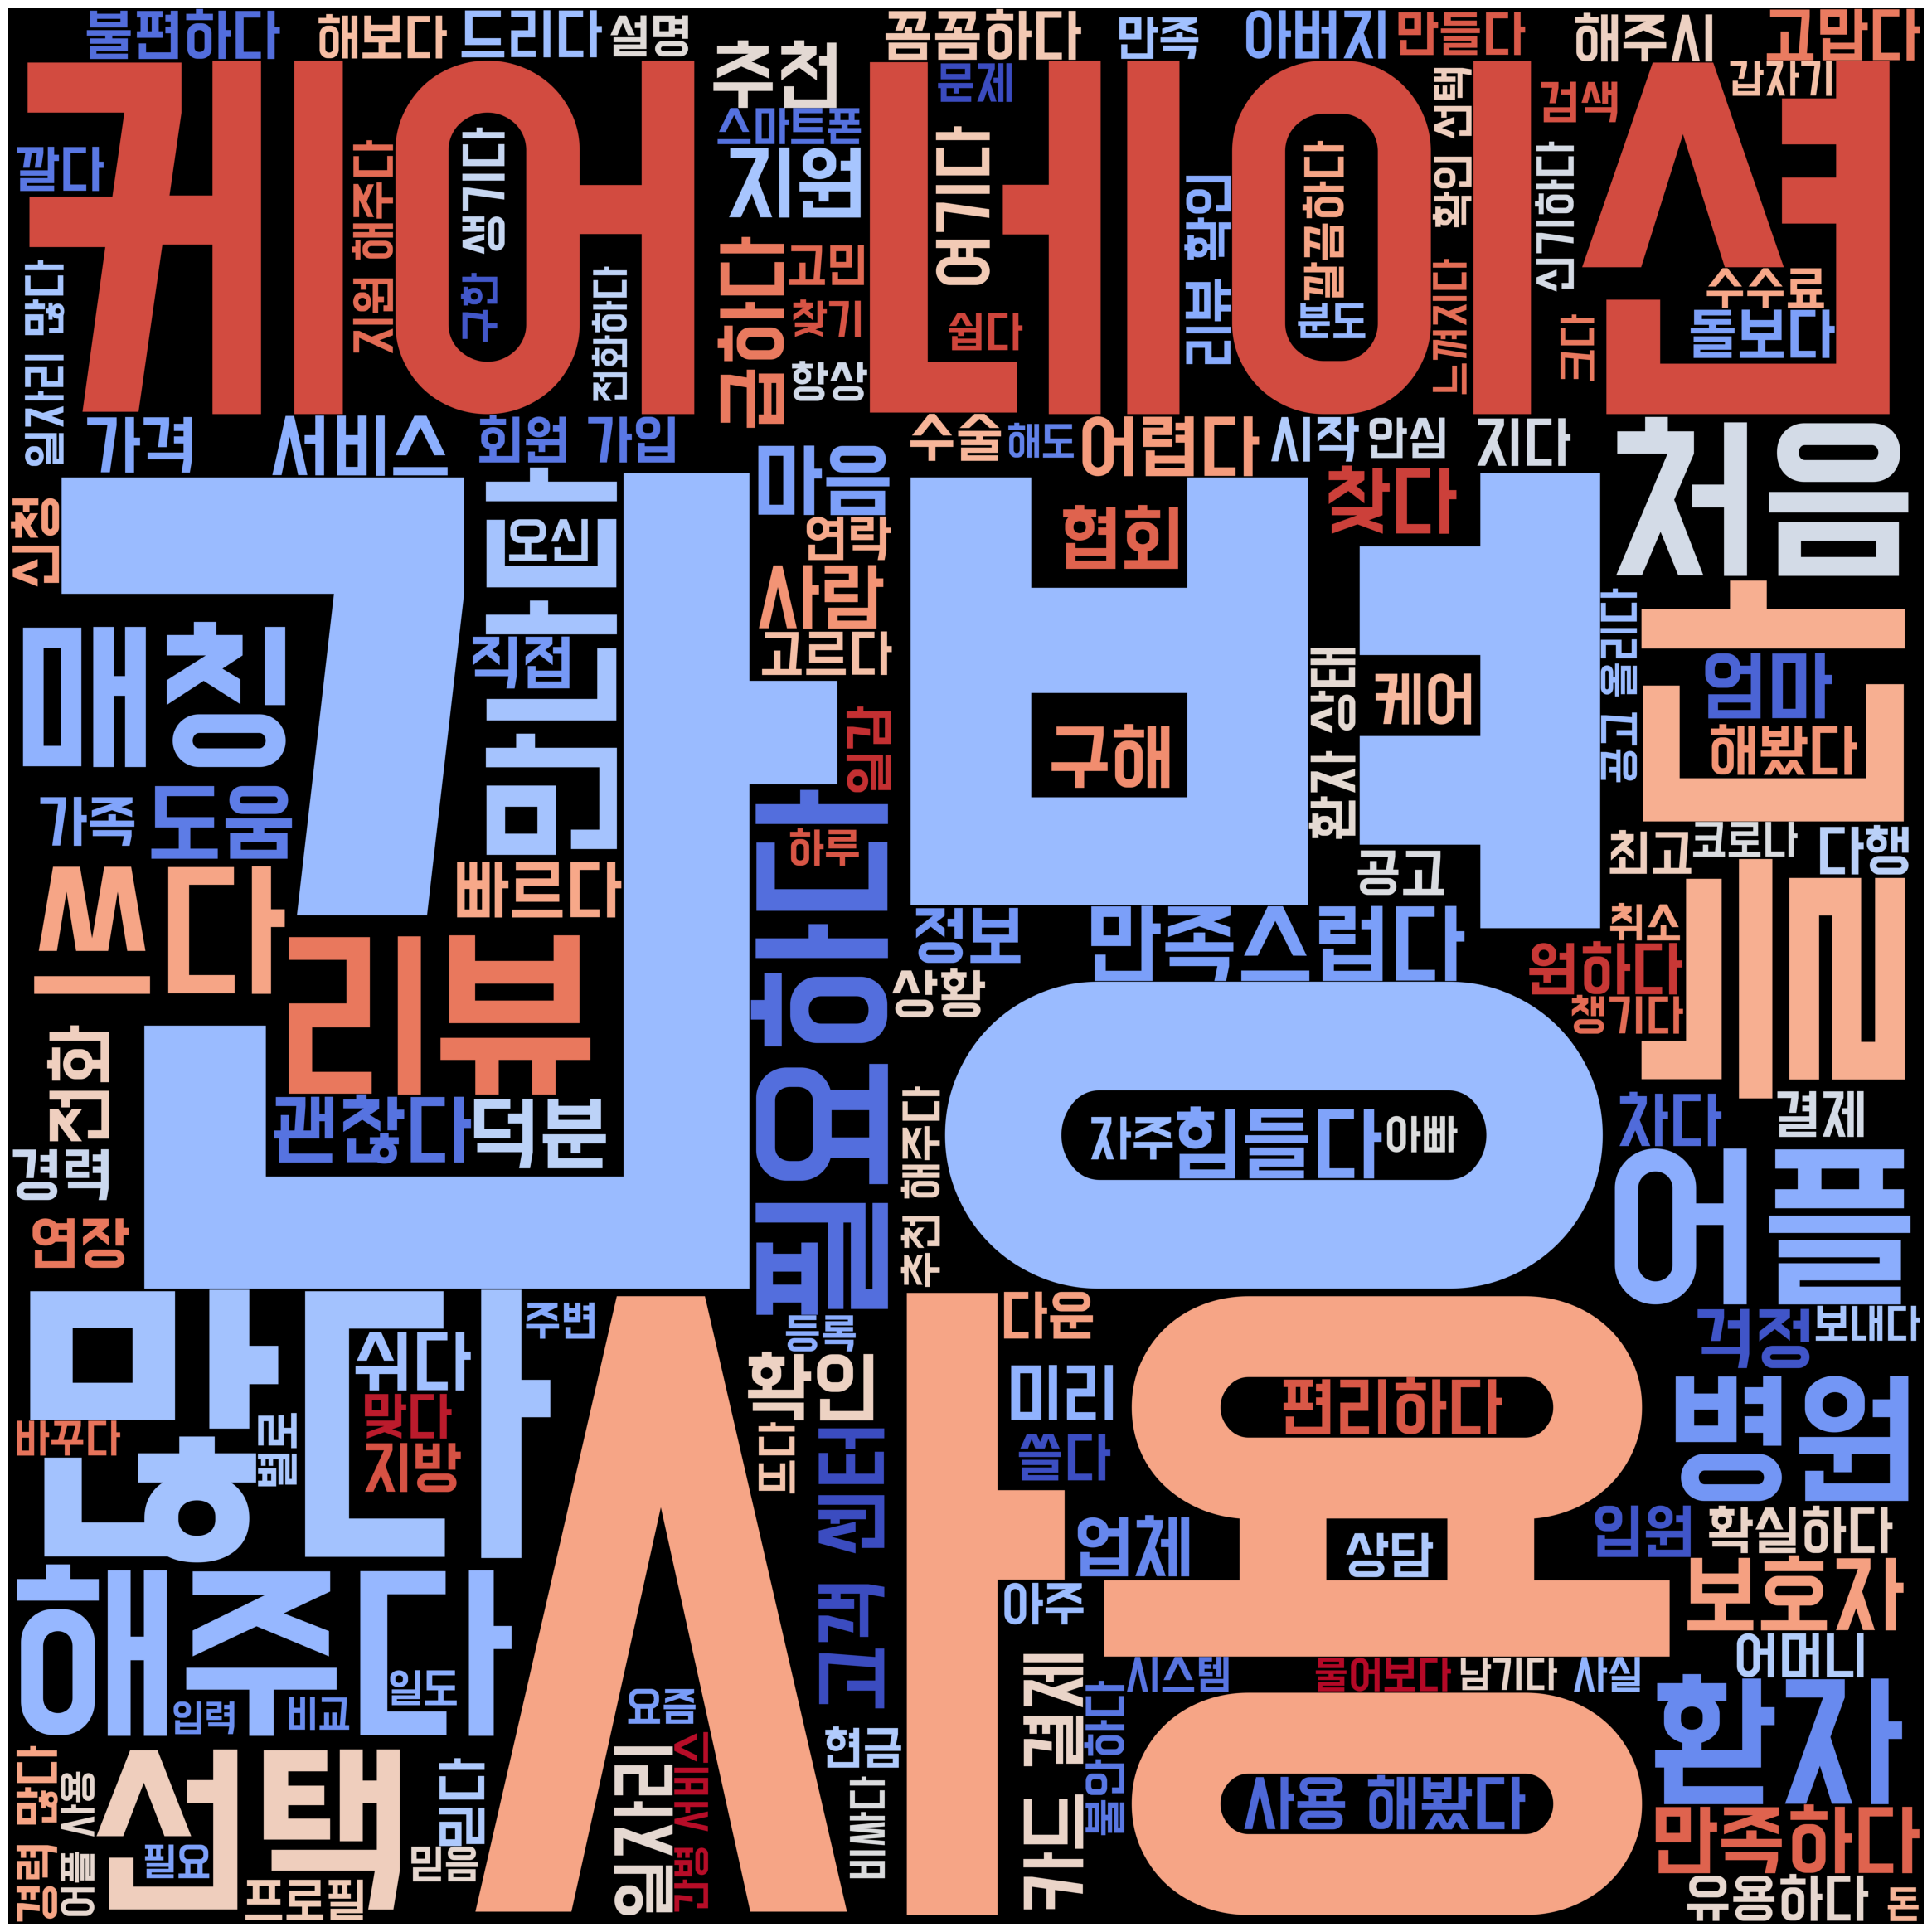

In [39]:
import matplotlib.pyplot as plt

# 워드 클라우드 이미지 표시
plt.figure(figsize=(30, 30))
plt.imshow(wordCloud)
plt.axis('off')  # 축 없애기
plt.savefig('myfigure2.png', transparent = True)
plt.show()

In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Retrieve the corpus and dictionary using the lda_modeling function
model, corpus, dictionary = lda_modeling(review_prep_neg)

# Prepare the visualization data
vis_data = gensimvis.prepare(model, corpus, dictionary, n_jobs=-1)

# Display the visualization
pyLDAvis.display(vis_data)